# Assignment 03 - Replacing PC screen in a video

Print 4 aruco tags with different ids and place them in the corner of the monitor so that the tags are visible. You have to keep some white border around the aruco marker. Create a short video of the monitor with these marks. In each frame of the video, detect the marks and project a UTB.jpg image with the adjusted perspective into the corners of the monitor. Save the resulting video.

---
---

## Project Structure and Execution Guide

The project is organized as follows:

- **images/**: Contains various images (e.g., university logos or other graphics) that can be used as overlays for the video processing. You can choose any image from this folder as input.
- **video_input/**: Contains the input video that will be processed.
- **video_output/**: Stores the output video with the overlay applied after processing.

### How to Run the Project

1. **Setup the Input Paths**:
   - In the script, you will find a section dedicated to file paths (`video_path`, `overlay_image_path`, and `output_path`). Update these paths if you want to:
     - Use a different input video.
     - Use a specific overlay image.
     - Save the output video in a custom location.

3. **Progress Monitoring**:
   - During execution, a progress bar will indicate the percentage of frames processed.
   - Additionally, three intermediate visualizations will be displayed for the first frame:
     1. Detected ArUco marker contours.
     2. The binary mask applied to isolate the overlay region.
     3. The final frame with the overlay applied.

4. **Output Video**:
   - After processing, the output video will be saved in the `video_output/` folder.

---

## Step 1: Import Libraries

We import the following libraries:
- `cv2`: OpenCV for computer vision tasks.
- `numpy`: To handle numerical operations and matrix transformations.
- `tqdm`: To create a progress bar for tracking the frame processing progress.
- `matplotlib.pyplot`: Used for the intermediate visualization of results during video processing. It provides functionalities to create charts and display images in an intuitive and customizable way.


In [1]:
import cv2 as cv
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

## Step 2: Initialization

In this step, we set the parameters for:
1. The type of ArUco marker dictionary we are using.
2. File paths for the input video and overlay image.
3. Paths for output video.

The ArUco dictionary defines the type of markers to detect. Here, we use a 6x6 grid with 250 unique markers (`DICT_6X6_250`).


In [8]:
# Configuration
dictionary = cv.aruco.Dictionary_get(cv.aruco.DICT_6X6_250)
video_path = "/Users/giuseppeadduce/Desktop/MA 2 progetto/video_input/INPUT.mp4"  # Path video
overlay_image_path = "/Users/giuseppeadduce/Desktop/MA 2 progetto/images/BATA.jpg"  # overlay path image
output_path = "/Users/giuseppeadduce/Desktop/MA 2 progetto/video_output/Video_with_Bata.mp4" # output video

## Step 3: Load the Video File -  Load the Overlay Image - Configure Output Video  

**Load the Video File**:
We load the input video file specified by `video_path`:
- Ensure the video file exists and can be opened.
- If the file is missing or inaccessible, an error is raised.

---

**Load the Overlay Image**:

We load the image that will be overlaid onto the video frames:
- The image file is specified by `overlay_image_path`.
- If the file is not found, an error is raised to prevent further execution.

---

**Configure Output Video**: 

We retrieve properties of the input video:
- **`fps`**: Frames per second of the video.
- **`frame_width`** and **`frame_height`**: Dimensions of each video frame.




In [9]:
# Upload the video
capture = cv.VideoCapture(video_path)
if not capture.isOpened():
    raise FileNotFoundError(f"Il video '{video_path}' non è stato trovato o non può essere aperto.")

# Upload overlay image
overlay_image = cv.imread(overlay_image_path)
if overlay_image is None:
    raise FileNotFoundError(f"L'immagine '{overlay_image_path}' non è stata trovata.")

# Setting video parametrers
fps = int(capture.get(cv.CAP_PROP_FPS))
frame_width = int(capture.get(cv.CAP_PROP_FRAME_WIDTH))
frame_height = int(capture.get(cv.CAP_PROP_FRAME_HEIGHT))
fourcc = cv.VideoWriter_fourcc(*'mp4v')
output_video = cv.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

## Step 4: Process Video Frames  

This section processes each frame of the input video:

1. **Initialize the Progress Bar**:  
   - The total number of frames in the video is calculated using `cv.CAP_PROP_FRAME_COUNT`.  
   - A progress bar is set up with `tqdm` to track the frame processing progress.

2. **Frame Processing Loop**:  
   - **Read Frames**: Each frame is read from the video file. If there are no more frames, the loop ends.  
   - **Marker Detection**: ArUco markers are detected using `cv.aruco.detectMarkers`.  
   - **Marker Ordering**: Detected ArUco markers are reordered into a specific sequence:  
     1. Top-Left.  
     2. Top-Right.  
     3. Bottom-Right.  
     4. Bottom-Left.  
   - **Overlay Application**:  
     - The corners of the reordered markers are used to calculate a homography matrix.  
     - The overlay image is warped to match the perspective of the detected markers.  
     - A binary mask is created to isolate the marker region, and the overlay is blended with the original frame.  
   - **Dynamic Text Positioning**:  
     - Marker IDs are displayed near their respective markers. The text position dynamically adjusts based on the marker's location to avoid overlap and ensure visibility.  
   - **Visualization**:  
     - Contours of the markers are drawn for debugging purposes.  
     - Marker IDs are displayed near their respective markers.  

3. **Intermediate Visualization (First Frame Only)**:  
   - Intermediate visualizations include:  
     1. The first processed frame with marker contours drawn.  
     2. The binary mask applied to isolate the marker region.  
     3. The final frame with the overlay image applied.  

4. **Save Processed Frame**:  
   - Each processed frame is written to the output video file.  

5. **Resource Cleanup**:  
   - After processing all frames, the video capture and writer objects are released, and the final video is saved.  


Processing Video:   0%|          | 0/331 [00:00<?, ?it/s]

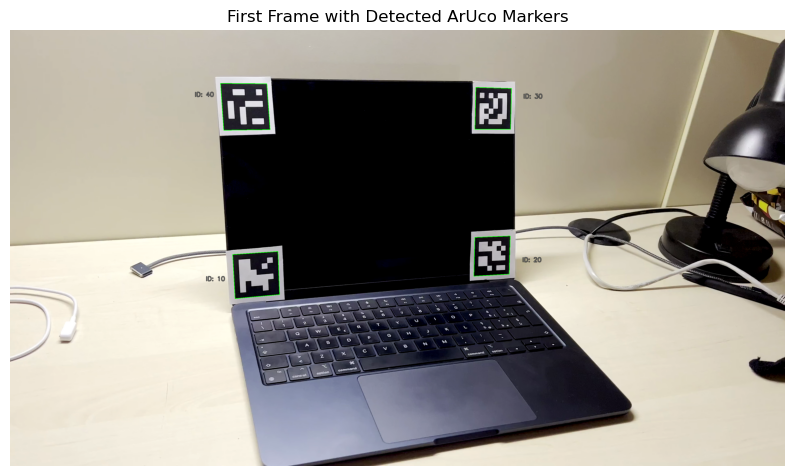

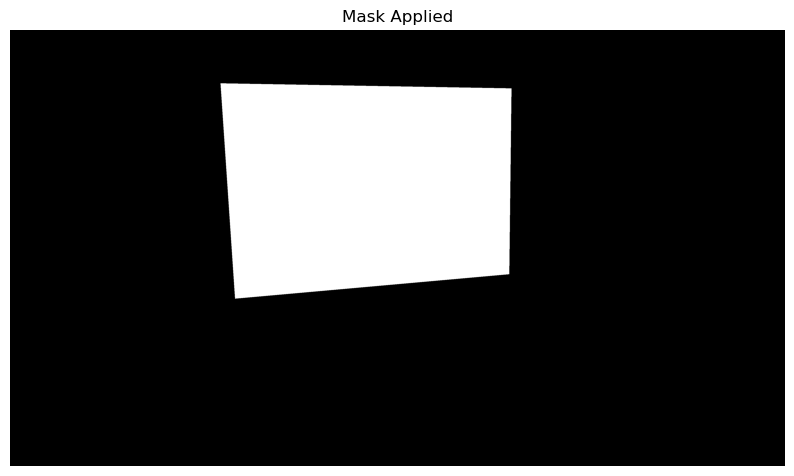

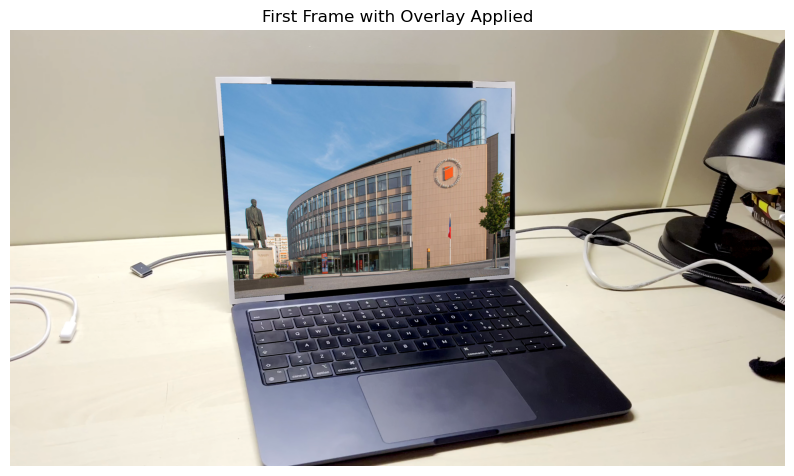

Processing Video: 100%|██████████| 331/331 [00:55<00:00,  5.91it/s]

End of video.
Video saved at '/Users/giuseppeadduce/Desktop/MA 2 progetto/video_output/Video_with_Bata.mp4'.


In [10]:
# Total frames for the progress bar
total_frames = int(capture.get(cv.CAP_PROP_FRAME_COUNT))
progress_bar = tqdm(total=total_frames, desc="Processing Video")

# Flag to control the display of frames
first_frame_processed = False

while True:
    ret, frame = capture.read()
    if not ret:
        print("End of video.")
        break

    # ArUco marker detection
    markerCorners, markerIds, _ = cv.aruco.detectMarkers(frame, dictionary)

    # Make a copy of the original frame before applying the overlay
    frame_with_markers = frame.copy()

    if markerIds is not None and len(markerIds) >= 4:  # At least 4 markers required
        # Retrieve corners of the first 4 detected markers
        ordered_corners = np.concatenate([markerCorners[i][0] for i in range(4)], axis=0)

        # Order corners: Top-Left, Top-Right, Bottom-Right, Bottom-Left
        rect = cv.boundingRect(ordered_corners)
        ordered_corners = [
            ordered_corners[np.argmin(ordered_corners[:, 0] + ordered_corners[:, 1])],  # Top-left
            ordered_corners[np.argmax(ordered_corners[:, 0] - ordered_corners[:, 1])],  # Top-right
            ordered_corners[np.argmax(ordered_corners[:, 0] + ordered_corners[:, 1])],  # Bottom-right
            ordered_corners[np.argmin(ordered_corners[:, 0] - ordered_corners[:, 1])]  # Bottom-left
        ]
        pts_dst = np.array(ordered_corners, dtype=np.float32)

        # Overlay image dimensions
        h, w, _ = overlay_image.shape
        pts_src = np.array([[0, 0], [w, 0], [w, h], [0, h]], dtype=np.float32)

        # Compute homography
        homography, _ = cv.findHomography(pts_src, pts_dst)

        # Warp overlay image
        warped_overlay = cv.warpPerspective(overlay_image, homography, (frame.shape[1], frame.shape[0]))

        # Create mask for the overlay
        mask = np.zeros((frame.shape[0], frame.shape[1]), dtype=np.uint8)
        cv.fillConvexPoly(mask, np.int32(pts_dst), 255)
        mask_inv = cv.bitwise_not(mask)

        # Apply mask to the original frame and overlay
        frame_bg = cv.bitwise_and(frame, frame, mask=mask_inv)
        overlay_fg = cv.bitwise_and(warped_overlay, warped_overlay, mask=mask)

        # Combine layers
        frame = cv.add(frame_bg, overlay_fg)

        # Draw the contour of each ArUco marker
        for idx, corner in enumerate(markerCorners):
            corners = corner[0].reshape((4, 2)).astype(np.int32)
            cv.polylines(frame_with_markers, [corners], True, (0, 255, 0), 2)  # Green contour

        # Draw the ID of each marker
        for idx, corner in enumerate(markerCorners):
            center = corner[0].mean(axis=0)  # Find the center of the marker
            id_text = f"ID: {markerIds[idx][0]}"

            # Adjust text position based on marker location
            if center[0] < frame_width / 2 and center[1] < frame_height / 2:
                # Top-left: move left and up
                text_position = (int(center[0] - 250), int(center[1] - 50))
            elif center[0] >= frame_width / 2 and center[1] < frame_height / 2:
                # Top-right: move right and up
                text_position = (int(center[0] + 150), int(center[1] - 50))
            elif center[0] < frame_width / 2 and center[1] >= frame_height / 2:
                # Bottom-left: move left and down
                text_position = (int(center[0] - 250), int(center[1] + 30))
            else:
                # Bottom-right: move right and down
                text_position = (int(center[0] + 150), int(center[1] + 30))

            # Draw text with black border and white fill
            cv.putText(frame_with_markers, id_text, text_position, cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 3, cv.LINE_AA)  # Black border
            cv.putText(frame_with_markers, id_text, text_position, cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 1, cv.LINE_AA)  # White text

        # Display intermediate frames only for the first frame
        if not first_frame_processed:
            # Frame with detected markers (contours)
            plt.figure(figsize=(10, 6))
            plt.title("First Frame with Detected ArUco Markers")
            plt.imshow(cv.cvtColor(frame_with_markers, cv.COLOR_BGR2RGB))
            plt.axis('off')
            plt.show()

            # Display mask
            plt.figure(figsize=(10, 6))
            plt.title("Mask Applied")
            plt.imshow(mask, cmap="gray")
            plt.axis('off')
            plt.show()

            # Display final frame with overlay
            plt.figure(figsize=(10, 6))
            plt.title("First Frame with Overlay Applied")
            plt.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))
            plt.axis('off')
            plt.show()

            # Set the flag to True after processing the first frame
            first_frame_processed = True

    # Write processed frame to output video
    output_video.write(frame.astype(np.uint8))
    progress_bar.update(1)

# Release resources
progress_bar.close()
capture.release()
output_video.release()
print(f"Video saved at '{output_path}'.")
